# Modelling

In [10]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score,KFold
import pickle as pkl

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# performance evaluation with confusion matrix, accuracy and f1 score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


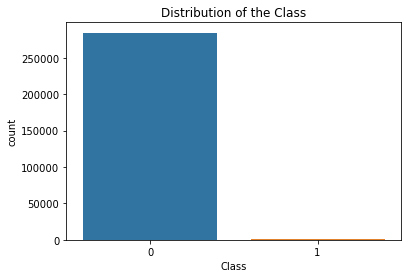

In [11]:
# Importing Data splitting module
import data_splitting as ds

In [12]:
# Split processed data into train and validation set
ds.split_dataset(r'..\data\processed\scaledData.csv', r'..\data\processed', 0.20)   

In [13]:
#Reading training dataset
train_data = r'..\data\processed\train.csv'
df_train = pd.read_csv(train_data)

In [14]:
#Reading validation dataset
validation_data = r'..\data\processed\test.csv'
df_validation =pd.read_csv(validation_data)

In [15]:
X_train = df_train.drop('Class', axis=1)
y_train = df_train['Class']

In [16]:
X_vali = df_validation.drop('Class', axis=1)
y_vali = df_validation['Class']

In [17]:
print("X_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("X_validation : ",X_vali.shape)
print("y_validation : ",y_vali.shape)

X_train :  (341172, 30)
y_train :  (341172,)
X_validation :  (85294, 30)
y_validation :  (85294,)


## Logistic Regression

In [18]:
# logistic regression
lr = LogisticRegression()

# fitting
lr.fit(X_train,y_train)

LogisticRegression()

In [19]:
# we feed the x_test values and store the predicted y values
lr_ypred = lr.predict(X_vali)

In [20]:
### Confusion Matrix

## calculation

# logistic regression
lr_cm = confusion_matrix(y_vali, lr_ypred, labels = [0, 1])

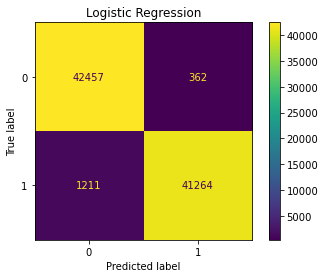

In [21]:
## plot

# logistic regression
disp = ConfusionMatrixDisplay(lr_cm)
disp.plot()
plt.title("Logistic Regression")
plt.show()

In [22]:
print("Number of transactions falesly reported as being fraud:")
print("Logistic Regression:", lr_cm[0][1])

Number of transactions falesly reported as being fraud:
Logistic Regression: 362


In [23]:
# accuracy
print("Accuracy:")

print("Logistic Regression:", round(accuracy_score(y_vali, lr_ypred)*100, 4), "%")

# Precision
print("Precision:")

print("Logistic Regression:", round(precision_score(y_vali, lr_ypred)*100, 4), "%")

# Recall
print("Recall:")

print("Logistic Regression:", round(recall_score(y_vali, lr_ypred)*100, 4), "%")

Accuracy:
Logistic Regression: 98.1558 %
Precision:
Logistic Regression: 99.1304 %
Recall:
Logistic Regression: 97.1489 %


In [24]:
# classification report LR
print('Summarized Classification Report of Logistic Regression:')
print(classification_report(y_vali, lr_ypred))
print()

Summarized Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     42819
           1       0.99      0.97      0.98     42475

    accuracy                           0.98     85294
   macro avg       0.98      0.98      0.98     85294
weighted avg       0.98      0.98      0.98     85294




## Decision Tree Classifier 

In [25]:
#1. DECISION TREE CLASSIFIER
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [26]:
decisiontree_prediction = dt_classifier.predict(X_vali)

In [27]:
a= confusion_matrix(y_vali,decisiontree_prediction)
print(a)
print(classification_report(y_vali,decisiontree_prediction))

[[42741    78]
 [   28 42447]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42819
           1       1.00      1.00      1.00     42475

    accuracy                           1.00     85294
   macro avg       1.00      1.00      1.00     85294
weighted avg       1.00      1.00      1.00     85294



In [28]:
acc = accuracy_score(y_vali, decisiontree_prediction)
print("The accuracy is {}".format(acc))
 
prec = precision_score(y_vali, decisiontree_prediction)
print("The precision is {}".format(prec))
 
rec = recall_score(y_vali, decisiontree_prediction)
print("The recall is {}".format(rec))
 
f1 = f1_score(y_vali, decisiontree_prediction)
print("The F1-Score is {}".format(f1))

The accuracy is 0.9987572396651582
The precision is 0.9981657848324516
The recall is 0.9993407886992348
The F1-Score is 0.9987529411764706


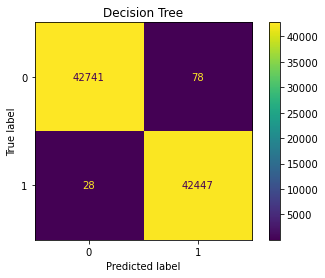

In [29]:
disp = ConfusionMatrixDisplay(a)
disp.plot()
plt.title("Decision Tree")
plt.show()

## KNN 

In [30]:
# k-nearest neighbors
knn = KNeighborsClassifier(n_neighbors = 5)
# fitting
knn.fit(X_train, y_train)
# we feed the x_test values and store the predicted y values
knn_ypred = knn.predict(X_vali)

In [31]:
# k-nearest neighbor
knn_cm = confusion_matrix(y_vali, knn_ypred, labels = [0, 1])

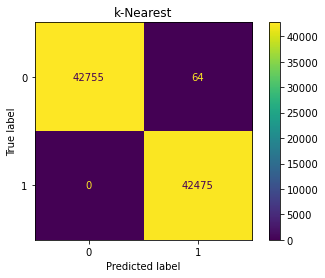

In [32]:
disp = ConfusionMatrixDisplay(knn_cm)
disp.plot()
plt.title("k-Nearest")
plt.show()

## Random Forest

In [33]:
# random forest
rf = RandomForestClassifier(max_depth = 4)
# fitting
rf.fit(X_train, y_train)
# we feed the x_test values and store the predicted y values
rf_ypred = rf.predict(X_vali)

In [34]:
# random forest
rf_cm = confusion_matrix(y_vali, rf_ypred, labels = [0, 1])

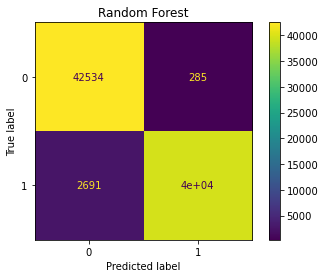

In [35]:
disp = ConfusionMatrixDisplay(rf_cm)
disp.plot()
plt.title("Random Forest")
plt.show()

##  XGB Classifier

In [36]:
import sys
!{sys.executable} -m pip install xgboost

In [37]:
#XGBOOST
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_vali)

In [38]:
print(classification_report(y_vali,xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42819
           1       1.00      1.00      1.00     42475

    accuracy                           1.00     85294
   macro avg       1.00      1.00      1.00     85294
weighted avg       1.00      1.00      1.00     85294



In [39]:
xgb_cm = confusion_matrix(y_vali, xgb_pred, labels = [0, 1])

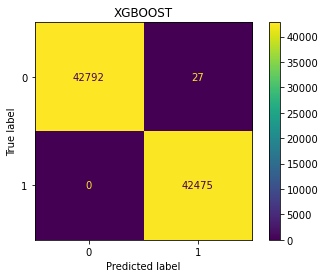

In [40]:
disp = ConfusionMatrixDisplay(xgb_cm)
disp.plot()
plt.title("XGBOOST")
plt.show()

##  LGBM Classifier

In [56]:
!pip install lightgbm

In [41]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(max_depth = 4)
clf.fit(X_train, y_train)
lgbm_pred=clf.predict(X_vali)

In [42]:
lgbm_cm = confusion_matrix(y_vali, lgbm_pred, labels = [0, 1])

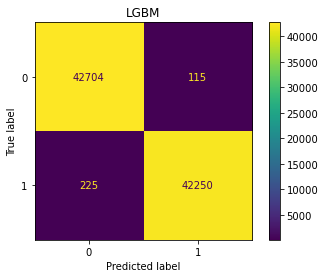

In [43]:
disp = ConfusionMatrixDisplay(lgbm_cm)
disp.plot()
plt.title("LGBM")
plt.show()

In [44]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [45]:
from prettytable import PrettyTable
 
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Model", "Accuracy (%)", "Precision (%)", "Recall (%)"])

# Add rows
myTable.add_row(["Logistic Regression", round(accuracy_score(y_vali, lr_ypred)*100, 4), round(precision_score(y_vali, lr_ypred)*100, 4), round(recall_score(y_vali, lr_ypred)*100, 4)])
myTable.add_row(["k-Nearest Neighbor", round(accuracy_score(y_vali, knn_ypred)*100, 4), round(precision_score(y_vali, knn_ypred)*100, 4), round(recall_score(y_vali, knn_ypred)*100, 4)])
myTable.add_row(["Random Forest", round(accuracy_score(y_vali, rf_ypred)*100, 4), round(precision_score(y_vali, rf_ypred)*100, 4), round(recall_score(y_vali, rf_ypred)*100, 4)])
myTable.add_row(["Decision Tree", round(accuracy_score(y_vali, decisiontree_prediction)*100, 4), round(precision_score(y_vali, decisiontree_prediction)*100, 4), round(recall_score(y_vali, decisiontree_prediction)*100, 4)])
myTable.add_row(["XGBOOST", round(accuracy_score(y_vali, xgb_pred)*100, 4), round(precision_score(y_vali, xgb_pred)*100, 4), round(recall_score(y_vali, xgb_pred)*100, 4)])
myTable.add_row(["LGBM", round(accuracy_score(y_vali, lgbm_pred)*100, 4), round(precision_score(y_vali, lgbm_pred)*100, 4), round(recall_score(y_vali, lgbm_pred)*100, 4)])

print(myTable)


# classification report LR
print('Summarized Classification Report of Logistic Regression:')
print(classification_report(y_vali, lr_ypred))
print()
print()
# classification report KNN
print('Summarized Classification Report of k-Nearest Neighbor:')
print(classification_report(y_vali, knn_ypred))
print()
print()
# classification report RF
print('Summarized Classification Report of Random Forest:')
print(classification_report(y_vali, rf_ypred))
print()
print()
# classification report LR
print('Summarized Classification Report of Decision Tree:')
print(classification_report(y_vali, decisiontree_prediction))
print()
print()
# classification report LR
print('Summarized Classification Report of XGBOSST:')
print(classification_report(y_vali, xgb_pred))
print()
print()
# classification report LR
print('Summarized Classification Report of LGBM:')
print(classification_report(y_vali, lgbm_pred))
print()
print()

+---------------------+--------------+---------------+------------+
|        Model        | Accuracy (%) | Precision (%) | Recall (%) |
+---------------------+--------------+---------------+------------+
| Logistic Regression |   98.1558    |    99.1304    |  97.1489   |
|  k-Nearest Neighbor |    99.925    |    99.8495    |   100.0    |
|    Random Forest    |   96.5109    |    99.2887    |  93.6645   |
|    Decision Tree    |   99.8757    |    99.8166    |  99.9341   |
|       XGBOOST       |   99.9683    |    99.9365    |   100.0    |
|         LGBM        |   99.6014    |    99.7285    |  99.4703   |
+---------------------+--------------+---------------+------------+
Summarized Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     42819
           1       0.99      0.97      0.98     42475

    accuracy                           0.98     85294
   macro avg       0.98      0.98      0.98  

In [46]:
# Save the xgb model

file_path = '../models/model_xgb.pkl'
pkl.dump(xgb, open(file_path, 'wb'))

In [47]:
# Save the random forest model

file_path = '../models/model_rf.pkl'
pkl.dump(rf, open(file_path, 'wb'))

In [48]:
# Save the logistic reg model

file_path = '../models/model_lr.pkl'
pkl.dump(lr, open(file_path, 'wb'))

In [49]:
# Save the decision tree model

file_path = '../models/model_dt.pkl'
pkl.dump(dt_classifier, open(file_path, 'wb'))

In [50]:
# Save the knn model

file_path = '../models/model_knn.pkl'
pkl.dump(knn, open(file_path, 'wb'))

In [51]:
# Save the lgbm model

file_path = '../models/model_clf.pkl'
pkl.dump(clf, open(file_path, 'wb'))

In [ ]:
# Hyper parameter tuning for Random Forest


